In [1]:
#fairness graphics - independent runs - 6 seeds ERM

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [3]:
base_path = Path('/home/lchanch/initial_training/results_output_sweep_12/results_independent_runs')
attributes = ['sex', 'ethnicity', 'age', 'sex_ethnicity']

df_test_results = {}
df_lr_results = {}

for attr in attributes:
    test_file = base_path / f'test_results_all_{attr}.csv'
    lr_file = base_path / f'lr_results_all_{attr}.csv'

    df_test_results[attr] = pd.read_csv(test_file)
    df_lr_results[attr] = pd.read_csv(lr_file)


In [4]:
#df_test_results

In [5]:
df_test_results['sex']['seed'].unique()

array([2, 4, 0, 1, 5, 3])

In [6]:
df_test_results['age'].head()

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,AUROC_va,...,AUROC_attr_3,balanced_acc_attr_3,TN_opt_attr_3,FN_opt_attr_3,TP_opt_attr_3,FP_opt_attr_3,FNR_opt_attr_3,FPR_opt_attr_3,prevalence_opt_attr_3,pred_prevalence_opt_attr_3
1,20df0d06ffb8dd25d2a2974cb15f6cdf,2,1,Cardiomegaly,age,0.811916,0.728376,0.308963,0.234284,0.814684,...,0.849654,0.724296,4261.0,215.0,258.0,457.0,0.454545,0.096863,0.091119,0.137738
2,15d34df00c4277b35f03be4b98c1f0ee,4,1,Cardiomegaly,age,0.813114,0.732031,0.292209,0.243729,0.816167,...,0.854219,0.733483,4228.0,203.0,270.0,490.0,0.429175,0.103858,0.091119,0.146407
4,90e81dd0965a15422372d67454f15bd1,0,1,Cardiomegaly,age,0.807435,0.707463,0.410193,0.174880,0.810993,...,0.852190,0.687759,4405.0,264.0,209.0,313.0,0.558140,0.066342,0.091119,0.100559
6,33b9a8d5ef15d43339151980f44c47e3,3,1,Cardiomegaly,age,0.803982,0.720675,0.329233,0.229418,0.809141,...,0.851777,0.705706,4315.0,238.0,235.0,403.0,0.503171,0.085418,0.091119,0.122905
7,3751f009141201b4c889f97b73206158,5,1,Cardiomegaly,age,0.803901,0.704766,0.401406,0.189061,0.809157,...,0.848688,0.679819,4360.0,267.0,206.0,358.0,0.564482,0.075880,0.091119,0.108650


In [7]:
df_test_results['ethnicity'].head()

,store_name,seed,hparams_seed,task,attr,AUROC_te,balanced_acc_opt_te,FNR_opt_te,FPR_opt_te,AUROC_va,...,AUROC_attr_3,balanced_acc_attr_3,TN_opt_attr_3,FN_opt_attr_3,TP_opt_attr_3,FP_opt_attr_3,FNR_opt_attr_3,FPR_opt_attr_3,prevalence_opt_attr_3,pred_prevalence_opt_attr_3
1,83b620ffb1ddc5e78a6c2260cae6a764,3,1,Cardiomegaly,ethnicity,0.803982,0.720675,0.329233,0.229418,0.809141,...,0.804977,0.718686,3699.0,344.0,731.0,1185.0,0.320000,0.242629,0.180399,0.321530
3,b9457f7c16a1a35982f6432cb674ef51,0,1,Cardiomegaly,ethnicity,0.807435,0.707463,0.410193,0.174880,0.810993,...,0.804882,0.701398,3989.0,445.0,630.0,895.0,0.413953,0.183251,0.180399,0.255915
4,ed5d8a7305a70ba37697c72be56a472e,5,1,Cardiomegaly,ethnicity,0.803901,0.704766,0.401406,0.189061,0.809157,...,0.801267,0.695902,3849.0,426.0,649.0,1035.0,0.396279,0.211916,0.180399,0.282598
6,f33c28fbb7c9261fd5bfacaaa32e5011,1,1,Cardiomegaly,ethnicity,0.810514,0.725267,0.330639,0.218828,0.815855,...,0.810273,0.714057,3781.0,372.0,703.0,1103.0,0.346047,0.225839,0.180399,0.303071
8,5da72cdc88bc6ea768aa1d8db3911c48,2,1,Cardiomegaly,ethnicity,0.811916,0.728376,0.308963,0.234284,0.814684,...,0.807260,0.719511,3648.0,331.0,744.0,1236.0,0.307907,0.253071,0.180399,0.332271


In [8]:
#95% CI boostrap
def bootstrap_ci(values, n_bootstrap=1000, alpha=0.05):
    values = np.asarray(values, dtype=float)
    boot_means = []

    for _ in range(n_bootstrap):# Bootstrap procedure: resample the data with replacement n_bootstrap times
        sample = np.random.choice(values, size=len(values), replace=True) # Draw a bootstrap sample of the same size as the original data
        boot_means.append(sample.mean()) # Compute the statistic of interest (mean) for the bootstrap sample

    # Compute the lower bound of the (1 - alpha) confidence interval using the percentile method
    ci_low = np.percentile(boot_means, 100 * alpha / 2) 
    ci_high = np.percentile(boot_means, 100 * (1 - alpha / 2))

    return ci_low, ci_high

In [9]:
attributes = [
    'fair_gap_sex',
    'fair_gap_ethnicity',
    'fair_gap_sex_ethnicity',
    'fair_gap_age'
]

tasks = sorted(df_test_results['sex']['task'].unique())

rows = []

for task in tasks:
    row = {'task': task}

    for attr in attributes:
        attr_key = attr.replace('fair_gap_', '')
        values = df_test_results[attr_key].loc[
            df_test_results[attr_key]['task'] == task, 'fair_gap'
        ].values

        mean = values.mean()
        std = values.std(ddof=1)

        ci_low, ci_high = bootstrap_ci(values)

        row[(attr, 'mean')] = mean
        row[(attr, 'std')] = std
        row[(attr, 'ci95_low')] = ci_low
        row[(attr, 'ci95_high')] = ci_high
        row[(attr, 'ci95_range')] = ci_high - ci_low

    rows.append(row)

df_fair_gap = pd.DataFrame(rows)

# Convert columns to MultiIndex
df_fair_gap.columns = pd.MultiIndex.from_tuples(
    [('task', '') if c == 'task' else c for c in df_fair_gap.columns]
)


In [10]:
df_fair_gap

task fair_gap_sex                                           \
                            mean       std  ci95_low ci95_high ci95_range   
0      Cardiomegaly    -2.886791  1.230192 -3.861889 -2.065423   1.796466   
1        No Finding     3.019354  0.473094  2.663864  3.396021   0.732158   
2  Pleural Effusion    -0.117567  0.589680 -0.497844  0.320077   0.817921   
3      Pneumothorax     4.810232  1.753064  3.572205  6.048669   2.476464   

  fair_gap_ethnicity                                ...  \
                mean       std  ci95_low ci95_high  ...   
0          -2.046339  1.431299 -3.119681 -1.147193  ...   
1           8.778120  1.197046  7.810895  9.622334  ...   
2           9.249721  0.986927  8.512147  9.978090  ...   
3           1.614695  2.959410 -0.619601  3.644222  ...   

  fair_gap_sex_ethnicity                                             \
                    mean       std   ci95_low  ci95_high ci95_range   
0              -5.019305  1.049585  -5.783755  -4.241340   1.542414   
1              10.955748  1.321049  10.011182  11.877236   1.866054   
2               8.189125  0.666201   7.719938   8.688932   0.968994   
3              15.878251  4.192963  12.842647  18.882670   6.040023   

  fair_gap_age                                             
          mean       std   ci95_low  ci95_high ci95_range  
0    23.907362  2.704686  22.135744  26.042984   3.907240  
1    30.184505  1.678493  28.938860  31.471244   2.532384  
2    15.786562  1.282079  14.769158  16.755812   1.986654  
3    -8.035905  4.658223 -11.264368  -4.807442   6.456926  

[4 rows x 21 columns]

In [11]:
task_order = ['No Finding', 'Pleural Effusion', 'Pneumothorax', 'Cardiomegaly']

# Reorder based on the 'task' column
df_fair_gap = df_fair_gap.set_index('task').loc[task_order].reset_index()
df_fair_gap

task fair_gap_sex                                           \
                            mean       std  ci95_low ci95_high ci95_range   
0        No Finding     3.019354  0.473094  2.663864  3.396021   0.732158   
1  Pleural Effusion    -0.117567  0.589680 -0.497844  0.320077   0.817921   
2      Pneumothorax     4.810232  1.753064  3.572205  6.048669   2.476464   
3      Cardiomegaly    -2.886791  1.230192 -3.861889 -2.065423   1.796466   

  fair_gap_ethnicity                                ...  \
                mean       std  ci95_low ci95_high  ...   
0           8.778120  1.197046  7.810895  9.622334  ...   
1           9.249721  0.986927  8.512147  9.978090  ...   
2           1.614695  2.959410 -0.619601  3.644222  ...   
3          -2.046339  1.431299 -3.119681 -1.147193  ...   

  fair_gap_sex_ethnicity                                             \
                    mean       std   ci95_low  ci95_high ci95_range   
0              10.955748  1.321049  10.011182  11.877236   1.866054   
1               8.189125  0.666201   7.719938   8.688932   0.968994   
2              15.878251  4.192963  12.842647  18.882670   6.040023   
3              -5.019305  1.049585  -5.783755  -4.241340   1.542414   

  fair_gap_age                                             
          mean       std   ci95_low  ci95_high ci95_range  
0    30.184505  1.678493  28.938860  31.471244   2.532384  
1    15.786562  1.282079  14.769158  16.755812   1.986654  
2    -8.035905  4.658223 -11.264368  -4.807442   6.456926  
3    23.907362  2.704686  22.135744  26.042984   3.907240  

[4 rows x 21 columns]

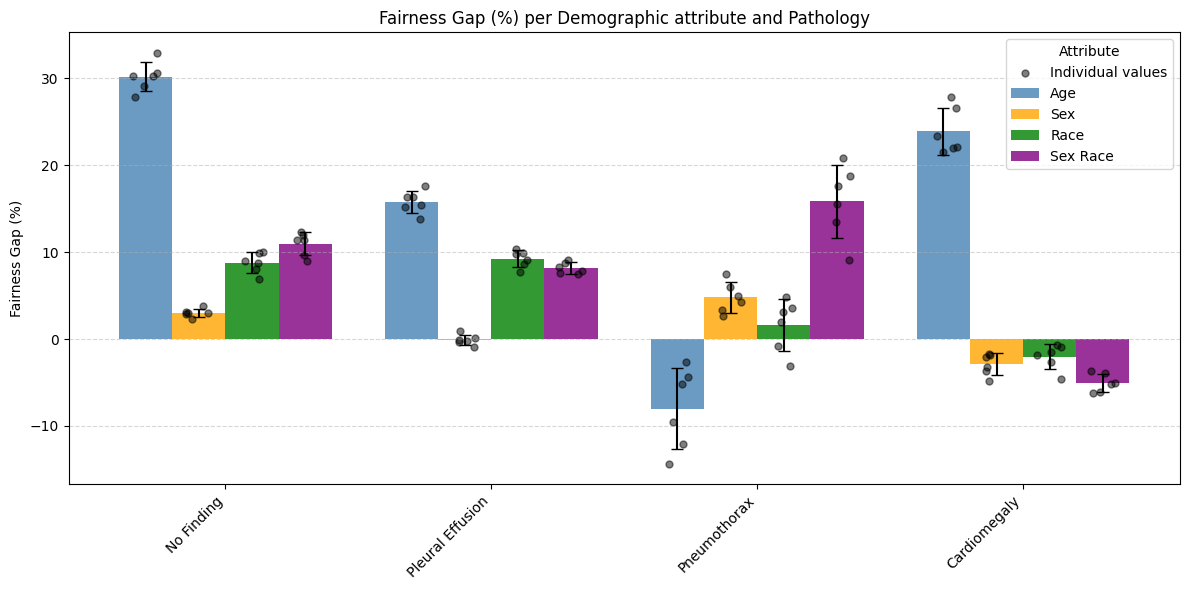

In [12]:
attributes = ['fair_gap_age', 'fair_gap_sex', 'fair_gap_ethnicity', 'fair_gap_sex_ethnicity']
colors = ['steelblue', 'orange', 'green', 'purple']
tasks = df_fair_gap[('task', '')].tolist()
#tasks = ['No Finding', 'Pleural Effusion', 'Pneumothorax','Cardiomegaly']
x = np.arange(len(tasks))  
width = 0.2 

test_results_dicts = {
    'fair_gap_age': df_test_results['age'].to_dict('records'),
    'fair_gap_sex': df_test_results['sex'].to_dict('records'),
    'fair_gap_ethnicity': df_test_results['ethnicity'].to_dict('records'),
    'fair_gap_sex_ethnicity': df_test_results['sex_ethnicity'].to_dict('records'),
}

attribute_label_map = {
    'fair_gap_age': 'Age',
    'fair_gap_sex': 'Sex',
    'fair_gap_ethnicity': 'Race',
    'fair_gap_sex_ethnicity': 'Sex Race'
}


plt.figure(figsize=(12, 6))


for i, attr in enumerate(attributes):
    means = df_fair_gap[(attr, 'mean')]
    stds = df_fair_gap[(attr, 'std')]
    bar_positions = x + i * width - 1.5 * width

    # draw bar plots
    plt.bar(bar_positions, means, yerr=stds, capsize=4, width=width,
            label=attribute_label_map[attr],
            color=colors[i], alpha=0.8)

    # individual points with jitter
    fair_gap_values = defaultdict(list)
    
    for entry in test_results_dicts[attr]: # dict containing all individual results
        fair_gap_values[entry['task']].append(entry['fair_gap']) # group by task

    for j, task in enumerate(tasks):
        values = fair_gap_values[task]
        x_jitter = 0.1 * (np.random.rand(len(values)) - 0.5)
        plt.scatter([bar_positions[j] + jitter for jitter in x_jitter],
                    values, color='black', alpha=0.5, s=25,
                    label='Individual values' if i == 0 and j == 0 else "")

# Labels and styling
plt.xticks(x, tasks, rotation=45, ha='right')
plt.ylabel("Fairness Gap (%)")
plt.title("Fairness Gap (%) per Demographic attribute and Pathology")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Attribute")
plt.tight_layout()
plt.show()

In [13]:
df_fair_gap['fair_gap_ethnicity']

,mean,std,ci95_low,ci95_high,ci95_range
0,8.778120,1.197046,7.810895,9.622334,1.811439
1,9.249721,0.986927,8.512147,9.978090,1.465944
2,1.614695,2.959410,-0.619601,3.644222,4.263823
3,-2.046339,1.431299,-3.119681,-1.147193,1.972488
